In [1]:
import os


import pandas as pd
import numpy as np
# import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from cal_feature import *
from plot_transient import *
from plot_feature1 import *
from plot_feature2 import *
from myMedFilter import *
from myHeatMap import *
from myScatter import *
from linearRegression import *

In [2]:
# define local directions
file_forder = "./transient_timeDomain/" 
up_dir = "./up_edge/"
down_dir = "./down_edge/"
up_pic_dir = "./up_edge_pic/"
down_pic_dir = "./down_edge_pic/"
PLOT_TRANSIENT = False
PLOT_FEATURE = True
DROP_OUTLIERS = True

# slice data while switching 
### 1. up-edge 
### 2. down-edge

In [3]:
# slice data
SAVE_TRANSIENT = False
PLOT_TRANSIENT = True
for (_ ,_ , process_files) in os.walk(file_forder):
    for file in process_files:
        sample_df = pd.read_csv(file_forder + file )
        sample_name = file[:-4]
        # get index in up and down edge
        n = np.where(sample_df.gateSignalVoltage.values>8)  # return a tuple so use n[0][0] to index
        # slice data
        up_df = sample_df.iloc[n[0][0]-30:n[0][0]+482,:]
        down_df = sample_df.iloc[n[0][-1]-30:n[0][-1]+482,:]
        # save data
        if SAVE_TRANSIENT:
            up_df.to_csv(up_dir+file,index = False)
            down_df.to_csv(down_dir+file,index = False)
        up_df = up_df.drop(["collectorEmitterCurrentSingal"],axis = 1)
        up_df["P"] = up_df["gateEmitterVoltage"]*up_df["collectorEmitterVoltage"]
        down_df = down_df.drop(["collectorEmitterCurrentSingal"],axis = 1)
        down_df["P"] = down_df["gateEmitterVoltage"]*down_df["collectorEmitterVoltage"]
        # plot data
        if PLOT_TRANSIENT:
            plot_transient(down_df,sample_name, down_pic_dir)
            plot_transient(up_df,sample_name,up_pic_dir)

# show info
# print(sample_df.shape)
# print(sample_df.columns)
# sample_df.head()

# featuring

### extract features

In [4]:
# define local directions
up_dir = "./up_edge/"
down_dir = "./down_edge/"

# down edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(down_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(down_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]

        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        cols = sample_df.columns
        feature_df = pd.DataFrame()
        for col in cols:
            df = cal_feature(sample_df, col)
            feature_df = pd.concat([feature_df,df],axis = 1)
        feature_df["Vce_pre"] = np.mean(sample_df['collectorEmitterVoltage'].values[:20])
        feature_df["P_pre"] = np.mean(sample_df['P'].values[:20])
        feature_df['round'] = int(file[0:-4])
        
        all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/down_edge_features.csv',index = False)

# up edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(up_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(up_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]

        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        cols = sample_df.columns
        feature_df = pd.DataFrame()
        for col in cols:
            df = cal_feature(sample_df, col)
            feature_df = pd.concat([feature_df,df],axis = 1)
        feature_df["Vce_post"] = np.mean(sample_df['collectorEmitterVoltage'].values[-20:])
        feature_df["P_post"] = np.mean(sample_df['P'].values[-20:])
        feature_df['round'] = int(file[0:-4])
        
        all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/up_edge_features.csv',index = False)

print(all_feature_df.shape)
all_feature_df.head()

(418, 81)


,gateEmitterVoltage_min,gateEmitterVoltage_max,gateEmitterVoltage_range,gateEmitterVoltage_mean,gateEmitterVoltage_mode,gateEmitterVoltage_median,gateEmitterVoltage_quantile25,gateEmitterVoltage_quantile75,gateEmitterVoltage_std,gateEmitterVoltage_var,...,P_sf,P_MI,P_CF,P_llr,P_pi,P_sdif,P_cpt1,Vce_post,P_post,round
0,-0.234375,9.531250,9.765626,6.751099,6.5625,7.031250,6.171875,8.671875,2.409324,5.804841,...,1.040004,1.371319,1.258229,1.570437,1.266813,0.295441,1.323907,3.325000,31.340578,1
0,-0.312500,9.609375,9.921876,6.669312,5.6250,7.148438,5.312500,8.828125,2.543540,6.469596,...,1.042222,1.455929,1.335066,1.659079,1.332491,0.305461,1.389435,2.312500,21.977535,2
0,-0.312500,9.609375,9.921876,6.631928,9.3750,7.187500,5.000000,8.925781,2.615747,6.842133,...,1.050687,1.516514,1.372742,1.577831,1.380347,0.332649,1.446629,2.343750,22.291256,3
0,-0.312500,9.609375,9.921876,6.625977,9.3750,7.343750,4.843750,8.906250,2.664592,7.100050,...,1.057980,1.589936,1.425769,1.534821,1.441147,0.357376,1.512812,2.414062,22.941891,4
0,-0.312500,9.609375,9.921876,6.607514,9.3750,7.500000,4.687500,8.906250,2.675634,7.159019,...,1.062474,1.577569,1.403721,1.514814,1.423177,0.367868,1.500703,2.462500,23.297121,5


### conband the up and down features

In [5]:
# conband the up and down features
up_df = pd.read_csv('./temp/up_edge_features.csv')
down_df = pd.read_csv('./temp/down_edge_features.csv')
up_cols = ['up_'+c for c in up_df.columns]
down_cols = ['down_'+c for c in down_df.columns]
up_df.columns = up_cols
down_df.columns = down_cols
up_df['round'] = up_df['up_round']
up_df.drop(['up_round'],axis = 1,inplace = True)
down_df['round'] = down_df['down_round']
down_df.drop(['down_round'],axis = 1,inplace = True)
train_df = pd.merge(up_df,down_df, how="left",on = "round" )

train_df.to_csv("./temp/train_feature_df.csv",index = False)
print(train_df.shape)
train_df.head()

(418, 161)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_I,down_P_sf,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre
0,-0.234375,9.531250,9.765626,6.751099,6.5625,7.031250,6.171875,8.671875,2.409324,5.804841,...,3.572700,1.580801,7.700055,2.426455,0.559720,3.606004,1.233000,7.172011,4.478125,43.976075
1,-0.312500,9.609375,9.921876,6.669312,5.6250,7.148438,5.312500,8.828125,2.543540,6.469596,...,4.226336,1.522700,6.922089,2.859756,0.680050,4.387227,1.180397,6.718276,2.031250,19.946285
2,-0.312500,9.609375,9.921876,6.631928,9.3750,7.187500,5.000000,8.925781,2.615747,6.842133,...,3.857486,1.493918,6.364814,2.655740,0.686635,3.964396,1.134687,6.188391,1.968750,19.387813
3,-0.312500,9.609375,9.921876,6.625977,9.3750,7.343750,4.843750,8.906250,2.664592,7.100050,...,3.496008,1.468333,5.664851,2.441062,0.699543,3.581464,1.097956,5.525323,1.890625,18.589473
4,-0.312500,9.609375,9.921876,6.607514,9.3750,7.500000,4.687500,8.906250,2.675634,7.159019,...,3.267459,1.439423,5.166336,2.334748,0.722006,3.362942,1.063073,5.023016,2.000000,19.609866


### add temperature 

In [6]:
# add temperature
train_df = pd.read_csv('./temp/train_feature_df.csv')
tempareture_df = pd.read_csv("collectorEmitterVoltage_peak_temperature.csv")
train_df["temperature"] = tempareture_df["tempareture"]
# change the target num
train_df["num_cycle"] = train_df["round"]
train_df.drop(['round'],axis = 1, inplace = True)

train_df.to_csv("./temp/train_feature_df.csv",index = False)

print(train_df.shape)
train_df.head()

(418, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
0,-0.234375,9.531250,9.765626,6.751099,6.5625,7.031250,6.171875,8.671875,2.409324,5.804841,...,7.700055,2.426455,0.559720,3.606004,1.233000,7.172011,4.478125,43.976075,47.211104,1
1,-0.312500,9.609375,9.921876,6.669312,5.6250,7.148438,5.312500,8.828125,2.543540,6.469596,...,6.922089,2.859756,0.680050,4.387227,1.180397,6.718276,2.031250,19.946285,124.804264,2
2,-0.312500,9.609375,9.921876,6.631928,9.3750,7.187500,5.000000,8.925781,2.615747,6.842133,...,6.364814,2.655740,0.686635,3.964396,1.134687,6.188391,1.968750,19.387813,178.408544,3
3,-0.312500,9.609375,9.921876,6.625977,9.3750,7.343750,4.843750,8.906250,2.664592,7.100050,...,5.664851,2.441062,0.699543,3.581464,1.097956,5.525323,1.890625,18.589473,215.428544,4
4,-0.312500,9.609375,9.921876,6.607514,9.3750,7.500000,4.687500,8.906250,2.675634,7.159019,...,5.166336,2.334748,0.722006,3.362942,1.063073,5.023016,2.000000,19.609866,244.451166,5


# drop outliers

In [6]:
PLOT_FEATURE = True
DROP_OUTLIERS = True
# drop outl
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]
round_num_del = [i-1 for i in round_num_del]

train_df = pd.read_csv('./temp/train_feature_df.csv')
if DROP_OUTLIERS:
    train_df.drop(round_num_del,axis = 0,inplace = True)
train_df = train_df.loc[train_df['temperature']>326,:]
if PLOT_FEATURE:
    plot_feature1(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(383, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
16,-0.312500,9.609375,9.921876,6.677246,9.296875,7.656250,4.843750,8.984375,2.717094,7.382597,...,3.861806,1.964209,0.793623,2.679392,0.962033,3.726270,1.778125,17.468753,329.912613,17
17,-0.234375,9.609375,9.843751,6.687317,9.296875,7.578125,4.902344,8.984375,2.718231,7.388780,...,3.933105,2.005006,0.792291,2.741046,0.973314,3.770286,1.746875,17.133792,327.237079,18
18,-0.234375,9.609375,9.843751,6.696015,9.296875,7.617188,4.921875,8.984375,2.697053,7.274097,...,4.184648,2.022462,0.761503,2.816410,1.000120,4.045160,1.787500,17.547366,326.213509,19
19,-0.312500,9.609375,9.921876,6.670990,9.453125,7.578125,4.902344,8.925781,2.722640,7.412770,...,3.973994,2.028353,0.792727,2.766666,0.975267,3.789127,1.796875,17.631839,329.365197,20
20,-0.312500,9.687500,10.000001,6.661224,9.375000,7.578125,4.843750,8.984375,2.714943,7.370915,...,4.038776,2.034798,0.784230,2.790610,0.981238,3.868603,1.793750,17.629397,328.195866,21


## filter

In [18]:
PLOT_FEATURE = True
# filter
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df.drop(round_num_del,axis = 0,inplace = True)
cols = [c for c in train_df.columns if c!="round"]
for c in cols:
    train_df[c] = myMedFilter(train_df[c].values)
if PLOT_FEATURE:
    plot_feature2(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers_filter.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(386, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
13,-0.3125,10.078125,10.390626,7.574158,9.84375,9.296875,6.152344,9.84375,3.221430,10.377609,...,7.602061,2.715831,0.601241,4.870076,1.399963,7.214460,1.748959,17.232425,324.270022,14
14,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.558117,2.715831,0.606585,4.870076,1.399722,7.176176,1.748959,17.232425,324.270022,15
15,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.748959,17.232425,325.316266,16
16,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.093750,9.84375,3.216108,10.343349,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.759375,17.236738,326.213509,17
17,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.092166,2.643536,0.615751,4.795571,1.390806,6.721554,1.761459,17.318769,327.237079,18


# correlation

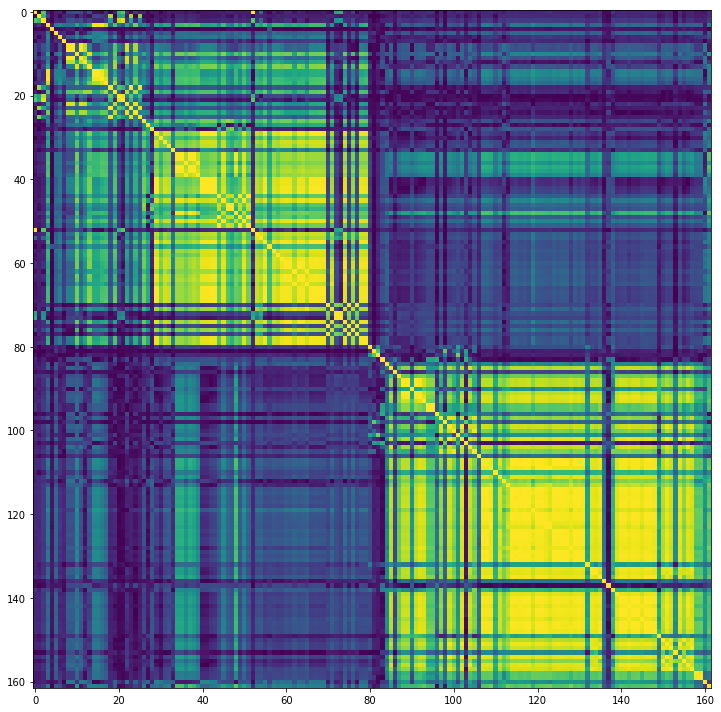

In [8]:
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
corr_df = train_df.corr().abs()
corr_df.to_csv("temp/coelationship_outliners.csv")
# plot
im =np.abs(corr_df.values) 
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.tight_layout()
plt.savefig('temp/correlationship'+'.png')


# feature select

In [7]:
# calculate corr
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
corr_df = train_df.corr().abs()

# collect the duplicate cols
cols = train_df.columns.values
del_cols = []
for i in range(cols.size):
    for j in range(i+1,cols.size,1):
        if(corr_df.iloc[i,j]>0.99):
            if(cols[j] not in del_cols):
                del_cols.append(cols[j])
print("length of delete cols:",len(del_cols))

train_df.drop(del_cols,axis = 1,inplace= True)
corr_df = train_df.corr().abs()
corr_df.sort_values(by = 'num_cycle',axis = 0, ascending=False, inplace = True)
l = corr_df.index.to_series()
x = corr_df.loc[:,'num_cycle']>0.6
cols = l[x].values
print("feature length:",len(cols)-1)
print(cols)
corr_df.head()

length of delete cols: 61
feature length: 23
['num_cycle' 'down_collectorEmitterVoltage_llr'
 'down_collectorEmitterVoltage_quantile75'
 'down_collectorEmitterVoltage_mean' 'up_collectorEmitterVoltage_llr'
 'down_P_mean' 'down_gateEmitterVoltage_kurt'
 'down_collectorEmitterVoltage_max' 'up_collectorEmitterVoltage_std'
 'down_P_kurt' 'down_gateEmitterVoltage_mad' 'down_P_max' 'down_P_skew'
 'down_gateEmitterVoltage_msv' 'down_gateEmitterVoltage_std'
 'down_gateEmitterVoltage_skew' 'down_collectorEmitterVoltage_quantile25'
 'down_P_quantile75' 'down_gateEmitterVoltage_llr' 'down_P_sdif'
 'down_collectorEmitterVoltage_kurt' 'down_P_MI'
 'down_collectorEmitterVoltage_median' 'down_P_I']


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_skew,...,down_P_sra,down_P_I,down_P_MI,down_P_CF,down_P_pi,down_P_sdif,down_Vce_pre,down_P_pre,temperature,num_cycle
num_cycle,0.127832,0.117705,0.175254,0.414028,0.003396,0.298356,0.250463,0.113600,0.054185,0.565013,...,0.561053,0.623091,0.639921,0.334684,0.563900,0.646891,0.382112,0.395635,0.170949,1.000000
down_collectorEmitterVoltage_llr,0.115234,0.110711,0.161088,0.342421,0.056028,0.310878,0.131281,0.095644,0.290247,0.399880,...,0.627227,0.881111,0.901759,0.491601,0.827972,0.948053,0.669542,0.675091,0.556613,0.796660
down_collectorEmitterVoltage_quantile75,0.125612,0.121305,0.176017,0.251361,0.034515,0.257190,0.100338,0.085070,0.314514,0.318490,...,0.671987,0.810210,0.824942,0.480431,0.771098,0.876081,0.629121,0.633827,0.504936,0.783889
down_collectorEmitterVoltage_mean,0.130256,0.116275,0.176107,0.388952,0.045805,0.339465,0.165312,0.112476,0.249505,0.462058,...,0.629668,0.872710,0.906920,0.476168,0.814330,0.944011,0.759657,0.761056,0.488438,0.776631
up_collectorEmitterVoltage_llr,0.075116,0.119004,0.136593,0.658331,0.017810,0.366459,0.351359,0.168215,0.164255,0.737462,...,0.420945,0.576183,0.617658,0.280185,0.507366,0.604345,0.478024,0.487503,0.034666,0.756358


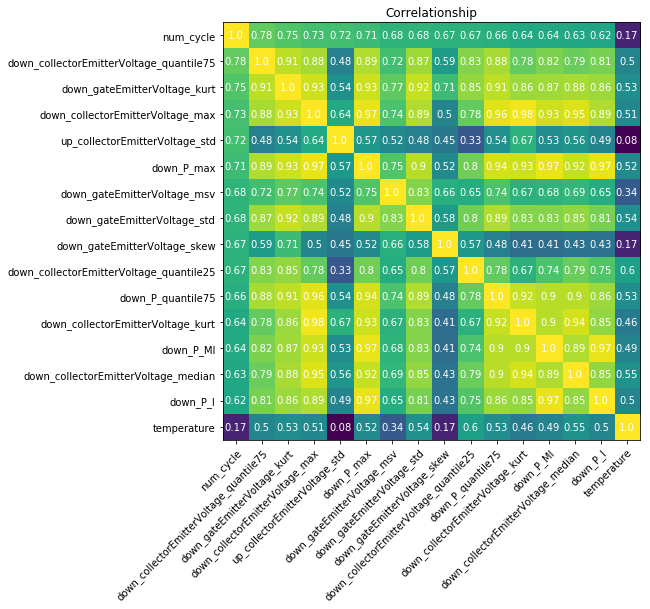

In [10]:
from myHeatMap import *
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')

# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
# train_df = pd.read_csv('./temp/train_df_scale.csv')
feature_df = train_df.loc[:,cols]
feature_df.to_csv('./temp/useful_feature_df.csv',index = False)
corr_df = feature_df.corr().abs()
corr_df.to_csv("temp/correlationship_usefue_features.csv")
# plot
im =np.abs(corr_df.values) 
im = im.round(2)
myHeatMap(im,cols,cols)

### scale to [0, 1]

In [7]:
# std
# feature_df = pd.read_csv('./temp/useful_feature_df.csv')
target = ["temperature","num_cycle"]
cols_to_use = [c for c in cols if c not in target]
fliter = MinMaxScaler()
for col in cols_to_use:
    feature_df[col] = fliter.fit_transform(feature_df[col].values.reshape(-1, 1))
    
X = feature_df[cols_to_use].values
feature_df.to_csv("temp/train_df_scale.csv",index = False)
feature_df.head()

NameError: name 'MinMaxScaler' is not defined

### dimension reduce

In [4]:
feature_df = pd.read_csv("temp/train_df_scale.csv")
target = ["temperature","num_cycle"]
cols_to_use = [c for c in feature_df.columns.values if c not in target]
X = feature_df[cols_to_use].values

feature_df.head()

,num_cycle,up_collectorEmitterVoltage_llr,up_collectorEmitterVoltage_std,down_P_mean,down_collectorEmitterVoltage_max,down_gateEmitterVoltage_kurt,down_P_sf,down_P_max,down_P_quantile75,down_P_MI,...,down_gateEmitterVoltage_msv,down_gateEmitterVoltage_quantile75,down_collectorEmitterVoltage_quantile75,down_gateEmitterVoltage_sdif,up_gateEmitterVoltage_skew,up_collectorEmitterVoltage_sf,down_collectorEmitterVoltage_median,down_gateEmitterVoltage_std,down_gateEmitterVoltage_sra,temperature
0,17,0.716696,0.519404,0.634215,0.629032,0.210838,0.522472,0.492622,0.641344,0.436961,...,0.801938,0.6,0.37500,0.455757,1.000000,0.745154,0.833333,0.605962,0.439825,329.912613
1,18,0.221619,0.826368,0.526987,0.709677,0.209354,0.476351,0.533485,0.516811,0.416931,...,0.751188,0.6,0.15625,0.436655,0.765671,0.768393,0.666667,0.846119,0.643546,327.237079
2,19,0.305743,0.686036,0.832453,0.951613,0.148879,0.808098,0.790011,0.820672,0.692599,...,0.835834,0.8,0.12500,0.828188,0.602096,0.543115,1.000000,0.885588,0.297975,326.213509
3,20,0.454839,0.714181,0.573270,0.645161,0.237734,0.492321,0.565834,0.642590,0.441721,...,0.634682,0.6,0.50000,0.527420,0.808537,0.830490,0.666667,0.764624,0.574437,329.365197
4,21,0.253959,0.799547,0.643024,0.741935,0.114086,0.553468,0.652667,0.716064,0.505227,...,0.813247,0.8,0.37500,0.563711,0.865340,0.747255,0.833333,0.947072,0.579455,328.195866


In [5]:
from myScatter import *
# PCA
# dimension reduce
pca = decomposition.PCA(n_components = 2)
X_reduce = pca.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/PCA'+'_map.csv',index = False)

    
myScatter(map_df,"PCA")    

NameError: name 'decomposition' is not defined

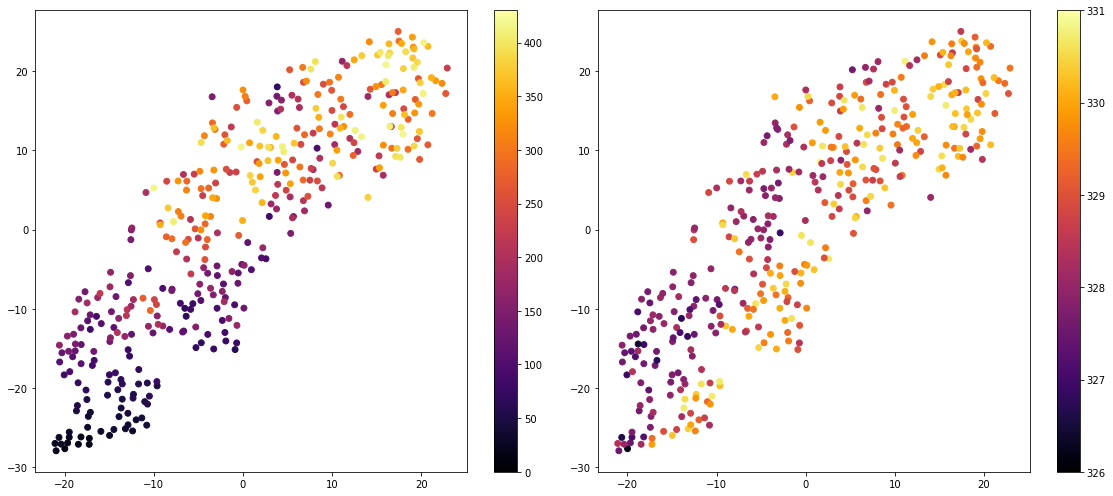

In [69]:
# TSNE
# dimension reduce
tsne = manifold.TSNE(n_components=2, init='random', random_state=1)
X_reduce = tsne.fit_transform(X)
# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"TSNE"+'.csv',index = False)
# plot
myScatter(map_df,"TSNE")  

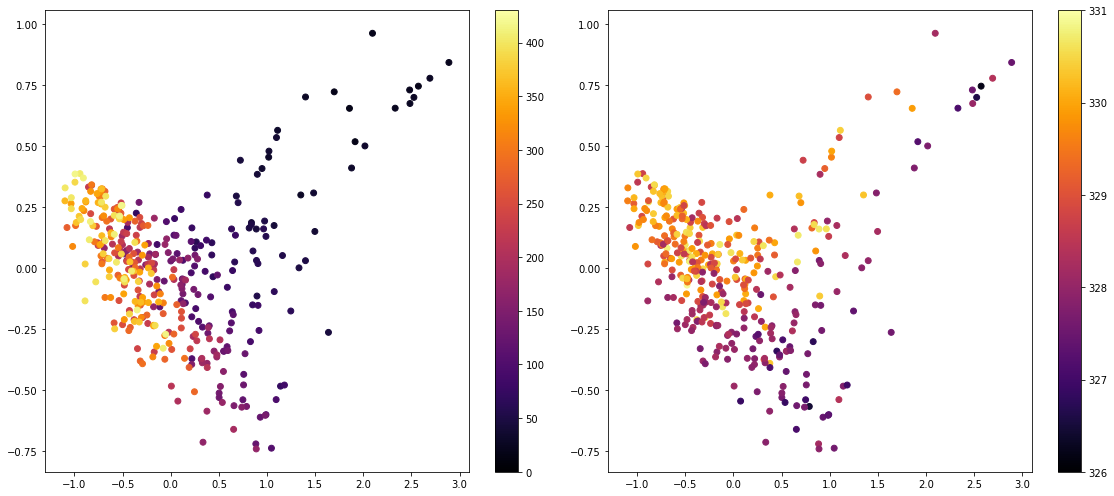

In [71]:
# Isomap
# dimension reduce
Isomap = manifold.Isomap(n_neighbors = 8 , n_components = 2)
X_reduce = Isomap.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"Isomap"+'.csv',index = False)
# plot
myScatter(map_df,"Isomap")  

In [ ]:
# MDS
# dimension reduce
mds = manifold.MDS(n_components=2)
X_reduce = mds.fit_transform(X)

# SpectralEmbedding
# dimension reduce
se = manifold.SpectralEmbedding(n_components= 2, n_neighbors= 10)
X_reduce = se.fit_transform(X)

### try some Nueral Network

In [12]:
train_df = pd.read_csv( "./temp/train_df_scale.csv")

print(train_df.shape)
train_df.head()

(383, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
0,0.5,0.333333,0.333333,0.145028,0.500000,0.6,0.000000,0.500,0.719187,0.717600,...,0.402249,0.222099,0.451956,0.328433,0.458152,0.431054,0.729167,0.741919,329.912613,17
1,1.0,0.333333,0.000000,0.236188,0.500000,0.2,0.250000,0.500,0.745913,0.744424,...,0.471316,0.501086,0.439998,0.508384,0.592869,0.470569,0.520833,0.513329,327.237079,18
2,1.0,0.333333,0.000000,0.314917,0.500000,0.4,0.333333,0.500,0.248329,0.246862,...,0.714984,0.620458,0.163588,0.728349,0.912966,0.717334,0.791667,0.795568,326.213509,19
3,0.5,0.333333,0.333333,0.088398,0.833333,0.2,0.250000,0.125,0.849513,0.848509,...,0.510925,0.660740,0.443905,0.583159,0.616193,0.487483,0.854167,0.853216,329.365197,20
4,0.5,0.666667,0.666667,0.000000,0.666667,0.2,0.000000,0.500,0.668655,0.666914,...,0.573679,0.704814,0.367627,0.653044,0.687495,0.558832,0.833333,0.851549,328.195866,21


# prepare data

In [3]:
cols =['num_cycle','up_collectorEmitterVoltage_llr',
 'up_collectorEmitterVoltage_std', 'down_P_mean',
 'down_collectorEmitterVoltage_max' ,'down_gateEmitterVoltage_kurt',
 'down_P_sf' ,'down_P_max' ,'down_P_quantile75', 'down_P_MI',
 'down_gateEmitterVoltage_mad', 'down_P_I', 'down_gateEmitterVoltage_msv',
 'down_gateEmitterVoltage_quantile75',
 'down_collectorEmitterVoltage_quantile75', 'down_gateEmitterVoltage_sdif',
 'up_gateEmitterVoltage_skew', 'up_collectorEmitterVoltage_sf',
 'down_collectorEmitterVoltage_median', 'down_gateEmitterVoltage_std',
 'down_gateEmitterVoltage_sra']

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

train_df = pd.read_csv( "./temp/train_df_scale.csv")
train_df["temperature"] = (train_df["temperature"] - 326)/5.0
target = ["num_cycle"]
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')
cols = [c for c in cols if c not in target]
print(cols)
# get data
x_train = train_df.loc[:,cols].values
y_train = train_df.loc[:,"num_cycle"].values/100.0
# astype
x_train = torch.tensor(x_train,dtype = torch.float32 )
y_train = torch.tensor(y_train,dtype = torch.float32)
y_train = y_train.unsqueeze_(1)
# split
x_test = x_train[350:]
y_test = y_train[350:]
x_train = x_train[:350]
y_train = y_train[:350]
print("train data size",x_train.shape)
print("train label size",y_train.shape)
print("test data size",x_test.shape)
print("test label size",y_test.shape)

['up_collectorEmitterVoltage_llr', 'up_collectorEmitterVoltage_std', 'down_P_mean', 'down_collectorEmitterVoltage_max', 'down_gateEmitterVoltage_kurt', 'down_P_sf', 'down_P_max', 'down_P_quantile75', 'down_P_MI', 'down_gateEmitterVoltage_mad', 'down_P_I', 'down_gateEmitterVoltage_msv', 'down_gateEmitterVoltage_quantile75', 'down_collectorEmitterVoltage_quantile75', 'down_gateEmitterVoltage_sdif', 'up_gateEmitterVoltage_skew', 'up_collectorEmitterVoltage_sf', 'down_collectorEmitterVoltage_median', 'down_gateEmitterVoltage_std', 'down_gateEmitterVoltage_sra', 'temperature']
train data size torch.Size([350, 21])
train label size torch.Size([350, 1])
test data size torch.Size([33, 21])
test label size torch.Size([33, 1])


In [ ]:
myset = MyDataset(x_train,y_train)
from torch.utils.data import DataLoader
train_loader = DataLoader(myset, batch_size=256, shuffle=True)

use gpu: True
step:[1000], train loss: 0.030308, test loss: 0.095096
step:[2000], train loss: 0.030259, test loss: 0.094839
step:[3000], train loss: 0.030213, test loss: 0.094604
step:[4000], train loss: 0.030168, test loss: 0.094256
step:[5000], train loss: 0.030115, test loss: 0.094116
step:[6000], train loss: 0.030070, test loss: 0.093705
step:[7000], train loss: 0.030031, test loss: 0.093424
step:[8000], train loss: 0.029996, test loss: 0.093311
step:[9000], train loss: 0.029963, test loss: 0.093302
step:[10000], train loss: 0.029932, test loss: 0.093166
step:[11000], train loss: 0.029903, test loss: 0.092965
step:[12000], train loss: 0.029874, test loss: 0.092942
step:[13000], train loss: 0.029788, test loss: 0.092699
step:[14000], train loss: 0.029663, test loss: 0.092774
step:[15000], train loss: 0.029619, test loss: 0.092662
step:[16000], train loss: 0.029583, test loss: 0.092652
step:[17000], train loss: 0.029552, test loss: 0.092503
step:[18000], train loss: 0.029524, test lo

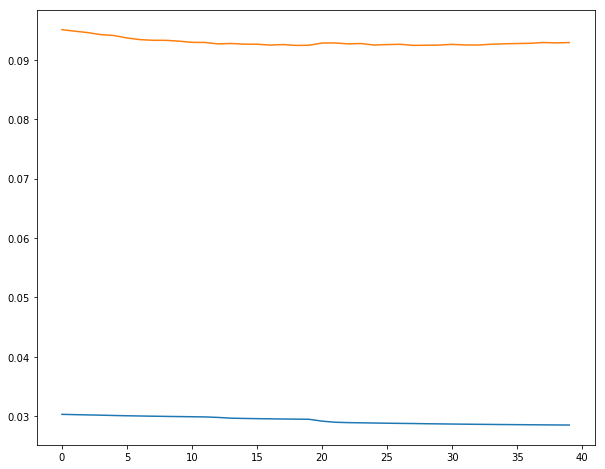

In [10]:
from neuralNetwork2 import *
from weight_init import *

use_gpu = torch.cuda.is_available()
print("use gpu:",use_gpu)
model = neuralNetwork2(21,10,1)
model.apply(weight_init)
try:
    model.load_state_dict(torch.load('./model/neuralNetwork2.pth'))
except:
    pass
if use_gpu:
    model = model.cuda()

# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 开始训练
losses_train  = []
losses_test = []
num_epochs = 40000
if use_gpu:
    X_batch =x_train.cuda()      
    y_batch =y_train.cuda()
else :
    X_batch =x_train      
    y_batch =y_train
for epoch in range(num_epochs):
    model.train()
    out = model(X_batch)
    loss = criterion(out, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        model.eval()
        with torch.no_grad():
            if use_gpu:
                x_test = x_test.cuda()
                y_test = y_test.cuda()
            predict = model(x_test)
            loss_test = criterion(predict, y_test)
        print(f'step:[{epoch+1}], train loss: {loss.item():.6f}, test loss: {loss_test.item():.6f}')
        losses_train.append(loss.item())
        losses_test.append(loss_test.item())

plt.figure(figsize = (10,8))
plt.plot(losses_train,label = "train loss")
plt.plot(losses_test,label = "teset loss")
plt.show()
torch.save(model.state_dict(), './model/neuralNetwork2.pth')

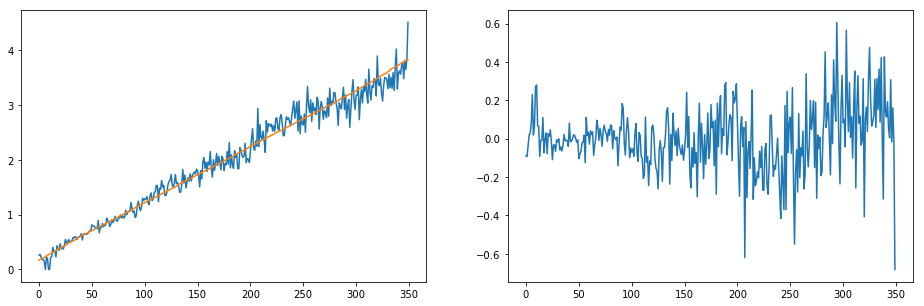

In [11]:
model.eval()
with torch.no_grad():
    x_train = x_train.cuda()
    predict = model(x_train)
predict = predict.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_train)
plt.subplot(122)
plt.plot((y_train-predict))
# a = train_df["temperature"].values
# plt.plot(a[:350]-0.5)
plt.show()

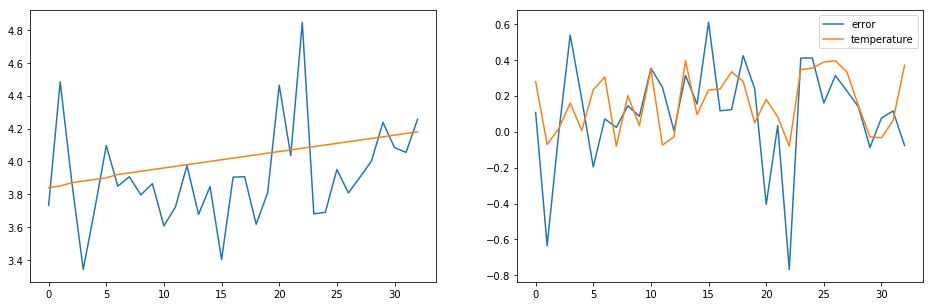

In [12]:
model.eval()
with torch.no_grad():
    x_test = x_test.cuda()
    predict = model(x_test)
predict = predict.cpu()
y_test = y_test.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_test)
plt.subplot(122)
plt.plot((y_test-predict),label = "error")
a = train_df["temperature"].values
plt.plot(a[350:]-0.5,label = "temperature")
plt.legend()
plt.show()